In [1]:
import pandas as pd

# from google.colab import drive
# drive.mount('/content/drive')

# pd.set_option("max_rows", None)

In [ ]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>


In [2]:
df_failedtrees=pd.read_csv('/Users/harrison/Desktop/Homeworks/ut-hub/nycparks_failedtrees/data/FailedTrees_20210621.csv')
df_riskassessments=pd.read_csv('/Users/harrison/Desktop/Homeworks/ut-hub/nycparks_failedtrees/data/FailedTrees_RiskAssessments_20210621.csv')
df_workhistory=pd.read_csv('/Users/harrison/Desktop/Homeworks/ut-hub/nycparks_failedtrees/data/FailedTrees_WorkHistory_20210621.csv',encoding = 'unicode_escape')

In [ ]:
df_failedtrees

,Tree_GlobalID,Tree_CreatedDate,Tree_Species,PostFail_SR_GlobalID,PostFail_SR_Type,PostFail_SR_Source,PostFail_SR_ResolutionAction,PostFail_SR_CreatedDate,PostFail_SR_CreatedYear,PostFail_SR_ClosedDate,NumberOfDuplicateSRs,PostFail_INSP_GlobalID,PostFail_INSP_InspectionDate,PostFail_INSP_Type,PostFail_INSP_Status,PostFail_INSP_Condition,PostFail_INSP_DBH,PostFail_INSP_Structure,PostFail_INSP_TRM,PostFail_WO_GlobalID,PostFail_WO_Type,DaysSinceInspection,PreFail_INSP_GlobalID,PreFail_INSP_InspectionDate,PreFail_INSP_Type,PreFail_INSP_Status,PreFail_INSP_Condition,PreFail_INSP_DBH,PreFail_INSP_Structure,PreFail_INSP_Rating,PreFail_INSP_TRM,Borough,CommunityBoard,CityCouncil,BuildingNumber,StreetName,TreeLocation,Shape,X_Coord,Y_Coord,FailedDuringStorm
0,37195E1A-A7EE-4AA4-8389-19A0ED5C46F7,3/3/2015 5:00 AM,Fraxinus pennsylvanica - Green ash,3E4FEC6D-8178-4B69-B27D-5ED8DA5924E5,Tree Down - Street,3-1-1 Call Center,Work Completed,3/3/2015 5:00 AM,2015.0,3/3/2015 5:00 AM,0.0,E340A03F-0BCA-4901-9664-F75FB4F17EB0,3/2/2015 5:00 AM,Level 1,Closed,Good,10.0,Full,No,084427D3-D35D-4B23-81AD-F0DD8D235596,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manhattan,110,9.0,10,WEST 135 STREET,Street,0xD7080000010C80894E9B7E8E2E4100B63630B2BE0C41,1.001279e+06,235478.2735,No
1,8717EC83-F165-495A-A1AA-1064173A681F,3/4/2015 5:00 AM,Zelkova serrata - Japanese zelkova,AE9E5D8E-DEF9-444A-B0A8-234462E7FC94,Tree Down - Sidewalk,3-1-1 Call Center,Work Completed,3/4/2015 5:00 AM,2015.0,3/4/2015 5:00 AM,0.0,FBDF1100-326D-494D-AA78-0E1626939B95,3/3/2015 5:00 AM,Level 2,Closed,Critical,12.0,Full,No,44B18003-FE79-4AC1-8F57-5C7724886057,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manhattan,107,7.0,808,COLUMBUS AV,Street,0xD7080000010C8060F2630E532E41003885CB93F30B41,9.936712e+05,228978.4744,No
2,F763D1C0-3020-434A-AD05-F61D69CEC648,3/8/2015 5:00 AM,Pyrus calleryana - Callery pear,0EBCBE65-0135-45B9-A7CB-0AB6FA4118A5,Tree Down - Sidewalk,Department of Parks and Recreation - Public We...,Work Completed,10/30/2017 3:08 PM,2017.0,11/1/2017 7:59 AM,2.0,429E0219-6229-49E5-8220-A04588A0F3CD,10/30/2017 4:00 AM,Level 2,Closed,Poor,10.0,Full,Yes,F6EE5379-9540-4A43-8473-351AA53858F8,Tree Down,791.0,32C71160-CA25-424A-99E6-99F539E3E050,8/31/2015 4:00 AM,Level 2,Closed,Poor,11.0,Full,NaN,No,Manhattan,104,3.0,340,WEST 50 STREET,Street,0xD7080000010C00C758020B242E41001800E035840A41,9.876535e+05,217222.7344,No
3,925EB161-3E0B-4F73-B45A-257B03DAF1E0,3/9/2015 4:00 AM,Pyrus calleryana - Callery pear,789317A7-7A63-4D99-B2A5-CAA00AA7403C,Limb Down - Other,3-1-1 Call Center,Work Completed,3/6/2015 5:00 AM,2015.0,3/8/2015 5:00 AM,0.0,2B3B1983-B80C-412A-9345-9D4BBF69600A,3/3/2015 5:00 AM,Level 1,Closed,Poor,4.0,Full,No,857D2135-81ED-42ED-A365-A5D9A4581E18,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manhattan,103,2.0,251,EAST 13 STREET,Street,0xD7080000010C00AF0DB46E282E41000A8C0582220941,9.882154e+05,205904.2527,No
4,560AADE4-1A81-443D-ADBA-412DCEF4899A,3/10/2015 4:00 AM,Ginkgo biloba - maidenhair tree,BD79972E-A3AE-4020-A5FF-3286AAFA8C01,Unauthorized Tree Removal,3-1-1 Call Center,Work Completed,3/6/2015 5:00 AM,2015.0,3/13/2015 4:00 AM,0.0,F0583608-5B94-4AC8-8800-F2CEE3410312,3/9/2015 4:00 AM,Level 1,Closed,Critical,2.0,Full,No,243A4BA3-EC85-47FA-80BF-C59BAC177CB6,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Brooklyn,307,38.0,187,18 STREET,Street,0xD7080000010C80416D80B9172E410086A0D3C91F0641,9.860768e+05,181241.2283,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,8BF74039-499F-44BE-9A8C-6EBD755ECD57,6/14/2021 1:49 PM,Acer buergerianum - trident maple,B19B9F62-3B0A-48E5-A2FC-ED2C7EA5B7D5,Tree Down - Sidewalk,3-1-1 Call Center,Work Priority Category - C,6/11/2021 10:46 AM,2021.0,NaN,0.0,03A2B332-78D3-4EF7-ADB1-46DBE2E29F2F,6/14/2021 4:00 AM,Level 1,Closed,Dead,6.0,Full,Yes,7F61FC09-53FD-4CB9-B14A-CBE5CBB81669,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,

### Risk Assessment First Glance

In [ ]:
df_riskassessments.head(1)

,Tree_GlobalID,INSPID,INSP_GlobalID,Risk_GlobalID,Risk_Defect,Risk_DefectLocation,Risk_Failure,Risk_ImpactTarget,Risk_FailureImpact,Risk_FailureConsequence,RiskRating,MitigationRecommendation,RiskRating_Grouped
0,3C5B726A-232A-4455-A79D-1F93BBFA104A,6516251,47F10AD4-28C0-4FD7-A3E8-A7F75A10575D,CB8C9B85-C6DF-496E-BCFE-6194DF812F71,Weak Branch Unions,Branches,Improbable (1),Very Low (1),Unlikely (2),Negligible (1),Low (3),NaN,Low


In [ ]:
df_riskassessments[df_riskassessments.Tree_GlobalID.duplicated()].sort_values(by='Tree_GlobalID').head(2)

,Tree_GlobalID,INSPID,INSP_GlobalID,Risk_GlobalID,Risk_Defect,Risk_DefectLocation,Risk_Failure,Risk_ImpactTarget,Risk_FailureImpact,Risk_FailureConsequence,RiskRating,MitigationRecommendation,RiskRating_Grouped
1258,004653A8-5C5B-4E4C-AE0B-AB360DA162CE,8795908,0C580696-D8A8-4C49-9A5A-A19BE857241F,559383B7-5EB8-4BCA-AF03-E1341CF8A07D,Poor Tree Architecture,Branches,Probable (3),Medium (3),Somewhat Likely (6),Significant (3),Moderate (9),REMOVE L/D,Moderate
1932,004653A8-5C5B-4E4C-AE0B-AB360DA162CE,6365745,B69F0172-649B-471A-B1FC-87E15633A071,ADC12848-A9A4-4CB1-BC0E-583CB7E50827,Dead Wood,Branches,Possible (2),Very Low (1),Unlikely (3),Negligible (1),Low (4),NaN,Low


In [ ]:
df_workhistory.Tree_GlobalID.nunique()

3827

In [ ]:
def group_ratings(x):
  y = ''
  if 'Low' in x:
    y = 'Low'
  elif 'Moderate' in x:
    y = 'Moderate'
  elif 'High' in x:
    y = 'High'
  elif 'Extreme' in x:
    y = 'Extreme'
  else:
    y = 'Unknown'
  return y

df_riskassessments['RiskRating_Grouped'] = df_riskassessments.RiskRating.apply(lambda x: group_ratings(str(x)))

In [ ]:
df_riskassessments.RiskRating_Grouped.value_counts()

Low         2185
Moderate     352
High         161
Extreme       14
Unknown        2
Name: RiskRating_Grouped, dtype: int64

In [ ]:
# df_riskassessments.Risk_Defect.value_counts()

In [ ]:
df_riskassessments.Risk_DefectLocation.value_counts()

Branches        1570
Stem             586
Entire Tree      257
Roots            148
Root Flare       132
Branch Union      21
Name: Risk_DefectLocation, dtype: int64

In [ ]:
df_riskassessments.groupby(['RiskRating_Grouped','Risk_DefectLocation'])['Tree_GlobalID'].count()

RiskRating_Grouped  Risk_DefectLocation
Extreme             Branch Union              1
                    Branches                  6
                    Root Flare                1
                    Roots                     4
                    Stem                      2
High                Branch Union              5
                    Branches                 83
                    Root Flare               17
                    Roots                    18
                    Stem                     38
Low                 Branch Union              6
                    Branches               1294
                    Entire Tree             257
                    Root Flare               90
                    Roots                   101
                    Stem                    437
Moderate            Branch Union              9
                    Branches                185
                    Root Flare               24
                    Roots                    25


In [ ]:
df_riskassessments.groupby(['RiskRating_Grouped','Risk_FailureConsequence'])['Tree_GlobalID'].count()

RiskRating_Grouped  Risk_FailureConsequence
Extreme             Severe (4)                  14
High                Minor (2)                    3
                    Severe (4)                  70
                    Significant (3)             88
Low                 Minor (2)                  934
                    Negligible (1)             674
                    Severe (4)                  90
                    Significant (3)            487
Moderate            Minor (2)                   57
                    Negligible (1)               5
                    Severe (4)                  86
                    Significant (3)            204
Unknown             Minor (2)                    1
                    Negligible (1)               1
Name: Tree_GlobalID, dtype: int64

In [ ]:
df_riskassessments.MitigationRecommendation.value_counts()[:30]

REMOVE TREE            33
remove tree            21
NWN                    17
REMOVAL                17
remove                 16
TARGET = PEDESTRIAN    13
Target = car           13
block prune            12
Prune                  11
nwr                    11
PRUNE                  11
NO WORK NEEDED         11
Remove tree            11
TARGET = CAR           10
Remove                 10
NWR                     8
R\T                     8
TARGET = PERSON         8
PRUNE DEADWOOD          8
prune                   8
MONITOR TREE            7
Remove tree             7
EAB - TREATMENT         7
Removal                 7
routine prune           6
REMOVE L/D              6
EAB REMOVE              6
REINSPECT               5
REMOVE                  5
REMOVE                  5
Name: MitigationRecommendation, dtype: int64

### Work History First Glance

In [ ]:
df_workhistory.head(3)

,Tree_GlobalID,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,INSP_TreeCondition,INSP_TreeStructure,INSP_TreeDBH,INSP_Comments,WO_CreatedDate,WO_ActualFinishDate,WO_Type,WO_Status,SR_GlobalID,SR_Type,SR_Source,SR_Status,SR_ResolutionAction,SR_CreatedDate,SR_ClosedDate
0,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424892,3322695F-96DD-4ED0-9444-AA1F3F52DFBC,No,9/18/2017 12:41 PM,Low (3),Level 2,Yes,9/13/2017 7:17 AM,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,Dead,Full,2.0,NaN,9/18/2017 12:41 PM,NaN,Tree Removal,Cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424893,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,No,8/30/2017 7:29 AM,NaN,Level 1,No,NaN,NaN,Dead,Full,2.0,BP17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B23389DD-3EDC-41EB-8CA8-000981F5D64B,6004857,A2AAC418-613F-4322-AD25-B90EB266069C,No,5/8/2017 9:24 AM,NaN,Level 1,No,NaN,NaN,Fair,Full,5.0,"4F, Block Prune FY18",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_workhistory[df_workhistory.INSP_Type == 'Level 2']

,Tree_GlobalID,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,INSP_TreeCondition,INSP_TreeStructure,INSP_TreeDBH,INSP_Comments,WO_CreatedDate,WO_ActualFinishDate,WO_Type,WO_Status,SR_GlobalID,SR_Type,SR_Source,SR_Status,SR_ResolutionAction,SR_CreatedDate,SR_ClosedDate
0,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424892,3322695F-96DD-4ED0-9444-AA1F3F52DFBC,No,9/18/2017 12:41 PM,Low (3),Level 2,Yes,9/13/2017 7:17 AM,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,Dead,Full,2.0,NaN,9/18/2017 12:41 PM,NaN,Tree Removal,Cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1954F552-A0D3-423A-B634-000B9B3C5A8C,6126446,3040BCB8-A93C-40E6-BF50-97E41BD936F5,No,6/5/2017 10:00 AM,Moderate (9),Level 2,No,NaN,NaN,Dead,Full,5.0,NaN,6/5/2017 10:00 AM,NaN,Tree Removal,Cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,EFBAF01F-4A03-4B92-8305-0012C453A924,7975513,7B3F5599-8E5E-46D6-8A3F-21BB1D303F7C,No,11/30/2018 11:32 AM,Low (4),Level 2,Yes,12/4/2018 8:19 AM,C5CB4519-FD13-4461-B533-B968EC5A66E3,Dead,Full,17.0,NaN,11/30/2018 11:33 AM,NaN,Tree Removal,Cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,A2C590F0-4AE2-428A-BD34-003F870CCC9C,10366804,55CFF50C-0EFA-4EE2-98FE-649D9131B2DE,No,5/18/2020 5:05 PM,Low (8),Level 2,No,NaN,NaN,Fair,Full,15.0,natural lean self correcting no uprooting evident,NaN,NaN,NaN,NaN,0E5C655A-3B41-4621-A06F-FF1132ACDA71,Tree Leaning,Department of Parks and Recreation - Public We...,Closed,Inspected - No Work Order,5/15/2020 4:06 PM,5/18/2020 5:05 PM
12,C2775315-6F15-4721-BB0B-0063B394091F,9111594,46022659-DFF9-4B2F-83AF-935C6D2FD478,No,9/16/2019 10:53 AM,Low (7),Level 2,No,NaN,NaN,Dead,Full,6.0,dead,9/16/2019 10:54 AM,11/12/2020 5:00 AM,Tree Removal,Closed,0C4E2D11-D081-4398-98DC-CBCC350BD0D1,Dead Tree Older Than 2 Years,3-1-1 Call Center,Closed,Work Completed,8/31/2019 8:05 PM,11/12/2020 6:30 PM
13,C2775315-6F15-4721-BB0B-0063B394091F,9693273,0FD4A97E-0ACD-417C-B991-5660C96C7819,No,2/8/2020 5:00 AM,Low (8),Level 2,No,NaN,NaN,Poor,Full,5.0,Tree is on Removal list,NaN,NaN,NaN,NaN,1A30F0AA-4A8E-4C61-AAED-C5309EB0EE24,Limb Down - Sidewalk,3-1-1 Call Center,Closed,Work Completed,2/7/2020 8:00 PM,2/8/2020 5:03 PM
20,9DC461A9-4A3C-4EF4-880E-00EA8A590F17,4129072,1756E333-99E9-4ED3-91D5-54F361F6B6A1,No,7/28/2016 4:00 AM,NaN,Level 2,No,NaN,NaN,Good,Full,24.0,"L/D 1F 24"" ASH",8/1/2016 3:32 PM,8/23/2016 4:00 AM,Limb Down,Closed,A54FE212-262D-4CDE-B61A-A1E85A7D62A8,Limb Down - Other,3-1-1 Call Center,Closed,Work Completed,7/18/2016 9:19 PM,1/13/2017 1:27 PM
21,9DC461A9-4A3C-4EF4-880E-00EA8A590F17,8021206,65E69C79-837D-49D9-A729-94B0333EF720,No,12/7/2018 11:11 AM,Low (7),Level 2,No,NaN,NaN,Poor,Full,24.0,[EAB +]. 1F. ASH. WORK ORDER CREATED FOR REMOV...,12/7/2018 11:12 AM,NaN,Tree Removal,Cancel,74196C67-21F5-4AB8-8062-E35A9FDFBA2C,Dead Tree Older Than 2 Years,3-1-1 Call Center,Closed,Inspected - No Work Order,11/19/2018 6:19 PM,11/21/2020 11:11 AM
22,E8781BB4-E9B2-446F-9634-00F251ABFB4C,3917342,6306B520-B462-4FA7-B529-76E3DEA678AD,No,7/14/2016 8:28 AM,Low (6),Level 2,No,NaN,NaN,Fair,Full,19.0,L/D CHIPPER NEEDED,7/14/2016 8:30 AM,7/20/2016 4:00 AM,Limb Down,Closed,6F039195-441F-4393-A7A4-F727447BD2BF,Hanging Limb from other Branches,3-1-1 Call Center,Closed,Work Completed,7/2/2016 1:50 PM,7/21/2016 12:31 PM
25,F66BCF71-FD05-4A87-ADC5-011796FB6122,5827683,047E6A80-9291-4CC4-ACDB-75387713F446,No,3/27/2017 10:13 AM,Moderate (9),Level 2,No,NaN,NaN,Good,Full,5.0,tree down side walk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_workhistory.Tree_GlobalID.value_counts()[:20]

9D5E622F-318B-4726-9054-85E554D9FC9E    17
F5F7159B-F3DA-4CBB-8F5B-13D0F642F258    14
18C126BD-6C47-42EF-8F23-D62F0A29DED0     8
30256596-CBBC-41E8-AB84-FEEE0B9A9C25     8
3D9BA179-133A-4D61-BB81-91E2B2852FEF     8
F77946F7-D968-4AA5-8D26-81C53A1E6AA8     8
83CC728D-3553-42D3-B01B-8CDD31B29433     7
781E8B27-CD1E-4BC3-8637-B86C8631BDC9     7
01A65B56-DAFD-4C75-887E-C4CA602CE5EB     7
27050604-D734-41B9-B847-A170C8C976A9     7
306085AA-EE56-4AC5-A8AC-97A605DEE646     7
28880439-B818-4209-B345-3C974D185051     7
D6F8DC22-584F-4E0A-B364-92AD839607E7     7
B646FF9D-EA8E-4BC7-8967-B5F84FA60E6A     7
BFABC8FC-5BCD-4183-AC9F-C255BFB3C33E     6
73D70350-AF1C-450A-9773-969084156101     6
B45B7E04-D982-4E94-AAE6-AB6B470326FF     6
FA8B09CB-F404-41FD-93F3-E0757AD4A99B     6
C331F169-68BE-49C7-9B9A-7BF5EF3AE270     6
0AD2DA17-A7A2-491F-8209-2CE855DD565F     6
Name: Tree_GlobalID, dtype: int64

In [ ]:
# The tree with 17 inspection records
df_failedtrees[df_failedtrees['Tree_GlobalID'] == '9D5E622F-318B-4726-9054-85E554D9FC9E']

,Tree_GlobalID,Tree_CreatedDate,Tree_Species,PostFail_SR_GlobalID,PostFail_SR_Type,PostFail_SR_Source,PostFail_SR_ResolutionAction,PostFail_SR_CreatedDate,PostFail_SR_CreatedYear,PostFail_SR_ClosedDate,NumberOfDuplicateSRs,PostFail_INSP_GlobalID,PostFail_INSP_InspectionDate,PostFail_INSP_Type,PostFail_INSP_Status,PostFail_INSP_Condition,PostFail_INSP_DBH,PostFail_INSP_Structure,PostFail_INSP_TRM,PostFail_WO_GlobalID,PostFail_WO_Type,DaysSinceInspection,PreFail_INSP_GlobalID,PreFail_INSP_InspectionDate,PreFail_INSP_Type,PreFail_INSP_Status,PreFail_INSP_Condition,PreFail_INSP_DBH,PreFail_INSP_Structure,PreFail_INSP_Rating,PreFail_INSP_TRM,Borough,CommunityBoard,CityCouncil,BuildingNumber,StreetName,TreeLocation,Shape,X_Coord,Y_Coord,FailedDuringStorm
4197,9D5E622F-318B-4726-9054-85E554D9FC9E,4/14/2016 1:25 PM,Platanus x acerifolia - London planetree,08FD14EE-F658-4150-B299-E9CCD5F60D7D,Tree Down - Street,3-1-1 Call Center,Work Completed,8/4/2020 7:45 PM,2020.0,8/14/2020 10:47 PM,4.0,BCA9AD86-C60B-4F0C-9EA9-084BD361D1D4,8/12/2020 4:00 AM,Level 1,Closed,Unknown,28.0,Full,Yes,03CFA34C-9404-4CFF-98C6-0BD0FB47B635,Tree Down,2.0,996536D0-C775-4D73-ADEA-82EEF93FC325,8/10/2020 4:00 AM,Level 2,Closed,Good,28.0,Full,High (10),Yes,Queens,408,24.0,82-32,167 STREET,Street,0xD7080000010C8026856B33BB2F4100CAE4D74C920841,1039769.71,201289.6054,Yes


In [ ]:
df_workhistory[df_workhistory['SR_ResolutionAction'] == 'Work Completed']

,Tree_GlobalID,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,INSP_TreeCondition,INSP_TreeStructure,INSP_TreeDBH,INSP_Comments,WO_CreatedDate,WO_ActualFinishDate,WO_Type,WO_Status,SR_GlobalID,SR_Type,SR_Source,SR_Status,SR_ResolutionAction,SR_CreatedDate,SR_ClosedDate
4,95E1F383-4504-4D1E-91BB-000AE2223385,7118171,A087568D-255B-4702-89AE-B1951C7F02AD,No,3/6/2018 5:00 AM,NaN,Level 1,No,NaN,NaN,Critical,Full,21.0,TREE DOWN BLOCKING ENTRANCE OV THE HOUSE,NaN,NaN,NaN,NaN,791DF178-CF97-4C55-9934-6951C9D5492C,Tree Down - Sidewalk,Department of Parks and Recreation - Public We...,Closed,Work Completed,3/3/2018 4:12 PM,3/7/2018 8:58 PM
12,C2775315-6F15-4721-BB0B-0063B394091F,9111594,46022659-DFF9-4B2F-83AF-935C6D2FD478,No,9/16/2019 10:53 AM,Low (7),Level 2,No,NaN,NaN,Dead,Full,6.0,dead,9/16/2019 10:54 AM,11/12/2020 5:00 AM,Tree Removal,Closed,0C4E2D11-D081-4398-98DC-CBCC350BD0D1,Dead Tree Older Than 2 Years,3-1-1 Call Center,Closed,Work Completed,8/31/2019 8:05 PM,11/12/2020 6:30 PM
13,C2775315-6F15-4721-BB0B-0063B394091F,9693273,0FD4A97E-0ACD-417C-B991-5660C96C7819,No,2/8/2020 5:00 AM,Low (8),Level 2,No,NaN,NaN,Poor,Full,5.0,Tree is on Removal list,NaN,NaN,NaN,NaN,1A30F0AA-4A8E-4C61-AAED-C5309EB0EE24,Limb Down - Sidewalk,3-1-1 Call Center,Closed,Work Completed,2/7/2020 8:00 PM,2/8/2020 5:03 PM
20,9DC461A9-4A3C-4EF4-880E-00EA8A590F17,4129072,1756E333-99E9-4ED3-91D5-54F361F6B6A1,No,7/28/2016 4:00 AM,NaN,Level 2,No,NaN,NaN,Good,Full,24.0,"L/D 1F 24"" ASH",8/1/2016 3:32 PM,8/23/2016 4:00 AM,Limb Down,Closed,A54FE212-262D-4CDE-B61A-A1E85A7D62A8,Limb Down - Other,3-1-1 Call Center,Closed,Work Completed,7/18/2016 9:19 PM,1/13/2017 1:27 PM
22,E8781BB4-E9B2-446F-9634-00F251ABFB4C,3917342,6306B520-B462-4FA7-B529-76E3DEA678AD,No,7/14/2016 8:28 AM,Low (6),Level 2,No,NaN,NaN,Fair,Full,19.0,L/D CHIPPER NEEDED,7/14/2016 8:30 AM,7/20/2016 4:00 AM,Limb Down,Closed,6F039195-441F-4393-A7A4-F727447BD2BF,Hanging Limb from other Branches,3-1-1 Call Center,Closed,Work Completed,7/2/2016 1:50 PM,7/21/2016 12:31 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5775,F5F2BC9C-15C7-4DBD-9217-FF4CD1F7495E,10178433,104C00F6-7276-45CA-A058-60DD4AF68759,No,4/13/2020 4:00 AM,Low (3),Level 2,No,NaN,NaN,Fair,Full,11.0,NaN,4/13/2020 2:29 PM,NaN,Hanging Limb,Cancel,D69AB012-E087-4642-BA61-0054B39B4783,Tree Down - Sidewalk,Department of Parks and Recreation - Public We...,Closed,Work Completed,4/13/2020 1:53 PM,4/14/2020 10:51 PM
5778,1B56B5C5-BF1B-42F5-8E8F-FF54FCA12076,2933971,8B2D4C33-5B3A-4BAD-937D-5A8B1FD95C20,No,3/30/2016 4:00 AM,NaN,Level 1,No,NaN,NaN,Fair,Full,12.0,"12"" N/M FAIR -- NWN",NaN,NaN,NaN,NaN,753D1065-AAF0-48B4-A535-561E79BBC351,Tree Down - Street,3-1-1 Call Center,Closed,Work Completed,4/3/2016 6:01 PM,4/12/2016 2:32 PM
5785,F0CDE3B3-7D02-45B8-92C2-FF7E8538E604,10768063,85CA1640-800B-41FC-B88E-25B55C529E07,No,7/10/2020 4:00 AM,Low (8),Level 2,No,NaN,NaN,Poor,Full,17.0,"F1 17IN LINDEN. HALF OF TREE SPLIT, REMOVE OTH...",7/10/2020 10:33 PM,NaN,Tree Removal,Cancel,72393544-8731-4A50-9000-99C557F60DF8,Tree Down - Other,3-1-1 Call Center,Closed,Work Completed,7/10/2020 8:01 PM,7/14/2020 5:42 PM
5788,F0CDE3B3-7D02-45B8-92C2-FF7E8538E604,8785948,3D16D7EC-7DE0-4E40-9E32-B2E197B995D3,No,6/25/2019 9:18 AM,Low (8),Level 2,No,NaN,NaN,Fair,Full,17.0,NaN,6/25/2019 9:31 AM,6/26/2019 4:00 AM,Limb Down,Closed,25C983C2-D33E-48C6-9DD0-9ACD9A51529E,Limb Down - Sidewalk,Correspondence,Closed,Work Completed,6/25/2019 10:22 AM,6/26/2019 6:39 PM


In [ ]:
df_workhistory.SR_ResolutionAction.value_counts()

Work Completed                                   850
Inspected - No Work Order                        524
Inspected - Condition Not Found                  259
T/S Inspected - Repair Pending                   196
No Action - Insufficient Info                     49
Work Priority Category - C                        40
Reviewed - Block Pruning                          38
Work Priority Category - D                        21
Reviewed - Inspection Assigned                    18
Conflicting Jurisdiction                          15
Inspected - Tentatively Approved for Planting     12
Storm Debris Removal Pending                      11
T/S Inspected - Ineligible                        11
Work Order Created                                 9
No Action - Jurisdiction                           9
SW Consultation Provided                           3
Inspected - Location Not Found                     2
Planting Declined - Unplantable                    1
Refer to DOT                                  

In [ ]:
# The tree with 17 inspection records
df_workhistory[df_workhistory['Tree_GlobalID'] == '9D5E622F-318B-4726-9054-85E554D9FC9E'].sort_values(by='INSPID')

,Tree_GlobalID,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,INSP_TreeCondition,INSP_TreeStructure,INSP_TreeDBH,INSP_Comments,WO_CreatedDate,WO_ActualFinishDate,WO_Type,WO_Status,SR_GlobalID,SR_Type,SR_Source,SR_Status,SR_ResolutionAction,SR_CreatedDate,SR_ClosedDate,RiskRating_Grouped
2887,9D5E622F-318B-4726-9054-85E554D9FC9E,3104907,C573BC5E-52B8-40F3-AAAD-529646A6727C,No,4/13/2016 4:00 AM,NaN,Level 2,No,NaN,NaN,Good,Full,28.0,"INSPECTED BY M. KAMINSKY ON 4/13/16, 1F, 28"" L...",NaN,NaN,NaN,NaN,1F9C2D80-7E88-42A3-9513-64CE959DFDDA,Limb Down - House,3-1-1 Call Center,Closed,Inspected - Condition Not Found,8/8/2016 11:17 PM,9/1/2016 8:19 PM,Unknown
2895,9D5E622F-318B-4726-9054-85E554D9FC9E,4437985,663FACBB-5070-4337-B9ED-F51A8CD1441E,No,9/1/2016 4:00 AM,NaN,Level 2,No,NaN,NaN,Good,Full,25.0,CONTRACT PRUNE,NaN,NaN,NaN,NaN,1F9C2D80-7E88-42A3-9513-64CE959DFDDA,Limb Down - House,3-1-1 Call Center,Closed,Inspected - Condition Not Found,8/8/2016 11:17 PM,9/1/2016 8:19 PM,Unknown
2886,9D5E622F-318B-4726-9054-85E554D9FC9E,5162360,C678771F-A591-4538-BDF7-5719BE8A1731,No,11/21/2016 10:26 AM,Moderate (9),Level 2,No,NaN,NaN,Poor,Full,25.0,tree has a blue tag,NaN,NaN,NaN,NaN,E6CC4AC9-1120-4DFB-A8E6-EE1DD99FB259,Limb Down - House,3-1-1 Call Center,Closed,Reviewed - Inspection Assigned,10/20/2016 6:21 AM,8/22/2017 11:36 AM,Moderate
2885,9D5E622F-318B-4726-9054-85E554D9FC9E,5496275,F4FD8A18-81C3-4082-813C-62F4F5646EBD,No,1/24/2017 5:00 AM,Low (3),Level 2,No,NaN,NaN,Good,Full,28.0,no limb down found,NaN,NaN,NaN,NaN,1B110D20-F728-4D7D-BB28-017F7C21FA4E,Limb Down - House,3-1-1 Call Center,Closed,Inspected - Condition Not Found,1/24/2017 2:06 AM,1/24/2017 1:30 PM,Low
2893,9D5E622F-318B-4726-9054-85E554D9FC9E,5630568,B7518CBD-DCE8-4AFE-B937-D7CAE659D37F,No,2/13/2017 12:50 PM,Low (3),Level 2,No,NaN,NaN,Good,Full,28.0,1f. no limb down found,NaN,NaN,NaN,NaN,2868B02C-46B4-4CD1-99B7-629DEEB98388,Limb Down - House,3-1-1 Call Center,Closed,Inspected - Condition Not Found,2/12/2017 2:19 AM,2/13/2017 12:48 PM,Low
2896,9D5E622F-318B-4726-9054-85E554D9FC9E,5801753,A7874136-BD62-47C9-8793-B63F5EAF385F,No,3/21/2017 10:00 AM,Low (3),Level 2,No,NaN,NaN,Good,Full,28.0,1f. no limb down found no work needed,NaN,NaN,NaN,NaN,096F6297-C1CF-4708-AC13-3FCFA4DBD755,Limb Down - Car,3-1-1 Call Center,Closed,Inspected - Condition Not Found,3/21/2017 9:02 AM,3/21/2017 9:59 AM,Low
2891,9D5E622F-318B-4726-9054-85E554D9FC9E,6229198,E9145444-E760-4BBE-BCF3-502644C6135A,No,7/6/2017 2:13 PM,Low (6),Level 2,No,NaN,NaN,Good,Full,28.0,"1F. 28"" LP. NO LIMB DOWN. BLOCK PRUNING RECOMM...",NaN,NaN,NaN,NaN,30F97D5A-46C4-41D0-8BD1-B1320FE95654,Limb Down - Car,3-1-1 Call Center,Closed,Reviewed - Inspection Assigned,5/28/2017 4:40 PM,7/6/2017 2:12 PM,Low
2892,9D5E622F-318B-4726-9054-85E554D9FC9E,6400311,994328C8-B53F-40F2-8507-74E426055BD3,No,8/22/2017 11:41 AM,Low (3),Level 2,No,NaN,NaN,Good,Full,28.0,"1F. 28"" LP. NO WORK NEEDED.",NaN,NaN,NaN,NaN,A48C7FB3-D4C4-4564-A5F7-F57412DB329B,Limb Down - Car,3-1-1 Call Center,Closed,Inspected - Condition Not Found,7/14/2017 9:48 PM,8/22/2017 11:40 AM,Low
2884,9D5E622F-318B-4726-9054-85E554D9FC9E,6400312,6C7E6586-7C62-4E18-8854-5FE3D5DEC14E,No,8/22/2017 11:37 AM,Low (7),Level 2,No,NaN,NaN,Good,Full,28.0,"1F. 28"" LP. BLOCK PRUNE.",NaN,NaN,NaN,NaN,E6CC4AC9-1120-4DFB-A8E6-EE1DD99FB259,Limb Down - House,3-1-1 Call Center,Closed,Reviewed - Inspection Assigned,10/20/2016 6:21 AM,8/22/2017 11:36 AM,Low
2890,9D5E622F-318B-4726-9054-85E554D9FC9E,6613093,FA79AC88-3892-48BE-A341-2943D2A7D68C,No,10/31/2017 12:55 AM,Low (3),Level 2,No,NaN,NaN,Good,Full,28.0,no limb down,NaN,NaN,NaN,NaN,00E08159-7312-47F6-9873-0A42B1606B73,Limb Down - Sidewalk,3-1-1 Call Center,Closed,Inspected - Condition Not Found,10/30/2017 10:09 PM,10/31/2017 12:56 AM,Low


In [ ]:
df_workhistory.groupby(['INSP_TreeCondition','RiskRating_Grouped'])['Tree_GlobalID'].count()


In [ ]:
#
df_workhistory.groupby(['INSP_TreeCondition','RiskRating_Grouped'])['Tree_GlobalID'].count()
#PreFail risk rating is not very accurate...

INSP_TreeCondition  RiskRating_Grouped
Critical            Extreme                  7
                    High                    33
                    Low                     20
                    Moderate                22
                    Unknown                 52
Dead                High                    22
                    Low                    241
                    Moderate                60
                    Unknown                295
Excellent           Low                      5
                    Unknown                 28
Fair                Extreme                  1
                    High                    28
                    Low                    648
                    Moderate                70
                    Unknown               1159
Good                Extreme                  3
                    High                    32
                    Low                    810
                    Moderate                65
                    U

In [ ]:
df_workhistory.groupby(['INSP_TreeCondition','IsReinspection'])['Tree_GlobalID'].count()

INSP_TreeCondition  IsReinspection
Critical            No                 131
                    Yes                  3
Dead                No                 566
                    Yes                 52
Excellent           No                  33
Fair                No                1853
                    Yes                 53
Good                No                2369
                    Yes                 36
Poor                No                 585
                    Yes                 49
Unknown             No                  62
                    Yes                  2
Name: Tree_GlobalID, dtype: int64

In [ ]:
#Trees that is reinspected
df_workhistory[df_workhistory.Tree_GlobalID.isin(df_workhistory[df_workhistory.IsReinspection == 'Yes']['Tree_GlobalID'].tolist())].sort_values(by=['Tree_GlobalID','INSPID']).head(3)

,Tree_GlobalID,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,INSP_TreeCondition,INSP_TreeStructure,INSP_TreeDBH,INSP_Comments,WO_CreatedDate,WO_ActualFinishDate,WO_Type,WO_Status,SR_GlobalID,SR_Type,SR_Source,SR_Status,SR_ResolutionAction,SR_CreatedDate,SR_ClosedDate
3608,00C847F1-C912-42C0-9C47-A3C77BD66B05,6528713,F4E17E83-73DE-4477-93A0-B5A73C1628A4,No,12/4/2017 12:49 PM,Low (3),Level 2,Yes,10/23/2017 3:12 PM,D2B0F06A-2FFF-404E-A0D9-56C5B66296E7,Fair,Full,8.0,NaN,12/4/2017 12:49 PM,2/27/2018 12:31 PM,Block Pruning,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3606,00C847F1-C912-42C0-9C47-A3C77BD66B05,6528714,D2B0F06A-2FFF-404E-A0D9-56C5B66296E7,No,10/9/2017 11:43 AM,NaN,Level 1,No,NaN,NaN,Poor,Full,8.0,1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3607,00C847F1-C912-42C0-9C47-A3C77BD66B05,9369782,6841EDE2-0B24-4FFB-9FFD-642487F13526,No,12/17/2019 5:00 AM,Low (5),Level 2,No,NaN,NaN,Dead,Full,10.0,NaN,12/17/2019 6:04 PM,NaN,Tree Removal,Cancel,6C0511B4-C758-46B8-B4D7-058DA201426C,Dead Tree Older Than 2 Years,3-1-1 Call Center,Closed,Work Priority Category - D,9/26/2019 2:39 PM,11/21/2020 11:11 AM


In [ ]:
df_workhistory['RiskRating_Grouped'] = df_workhistory.INSP_RiskRating.apply(lambda x: group_ratings(str(x)))

In [ ]:
df_failedtrees['PreFail_INSP_Rating_Grouped'] = df_failedtrees['PreFail_INSP_Rating'].apply(lambda x: group_ratings(str(x)))
merged = df_workhistory.merge(df_failedtrees[['Tree_GlobalID','PreFail_INSP_Rating_Grouped']], left_on='Tree_GlobalID',right_on='Tree_GlobalID')

In [ ]:
merged.merge(merged, left_on='INSP_GlobalID',right_on='INSP_ParentInspectionGlobalID').head(1)

,Tree_GlobalID_x,INSPID_x,INSP_GlobalID_x,AddressedFailure_x,INSP_InspectionDate_x,INSP_RiskRating_x,INSP_Type_x,IsReinspection_x,INSP_ReinspectionDate_x,INSP_ParentInspectionGlobalID_x,INSP_TreeCondition_x,INSP_TreeStructure_x,INSP_TreeDBH_x,INSP_Comments_x,WO_CreatedDate_x,WO_ActualFinishDate_x,WO_Type_x,WO_Status_x,SR_GlobalID_x,SR_Type_x,SR_Source_x,SR_Status_x,SR_ResolutionAction_x,SR_CreatedDate_x,SR_ClosedDate_x,RiskRating_Grouped_x,PreFail_INSP_Rating_Grouped_x,Tree_GlobalID_y,INSPID_y,INSP_GlobalID_y,AddressedFailure_y,INSP_InspectionDate_y,INSP_RiskRating_y,INSP_Type_y,IsReinspection_y,INSP_ReinspectionDate_y,INSP_ParentInspectionGlobalID_y,INSP_TreeCondition_y,INSP_TreeStructure_y,INSP_TreeDBH_y,INSP_Comments_y,WO_CreatedDate_y,WO_ActualFinishDate_y,WO_Type_y,WO_Status_y,SR_GlobalID_y,SR_Type_y,SR_Source_y,SR_Status_y,SR_ResolutionAction_y,SR_CreatedDate_y,SR_ClosedDate_y,RiskRating_Grouped_y,PreFail_INSP_Rating_Grouped_y
0,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424893,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,No,8/30/2017 7:29 AM,NaN,Level 1,No,NaN,NaN,Dead,Full,2.0,BP17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Low,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424892,3322695F-96DD-4ED0-9444-AA1F3F52DFBC,No,9/18/2017 12:41 PM,Low (3),Level 2,Yes,9/13/2017 7:17 AM,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,Dead,Full,2.0,NaN,9/18/2017 12:41 PM,NaN,Tree Removal,Cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low


In [ ]:
#trees with reinspections
merged.merge(merged, left_on='INSP_GlobalID',right_on='INSP_ParentInspectionGlobalID')[['Tree_GlobalID_x','INSP_InspectionDate_x','INSP_InspectionDate_y','INSP_TreeCondition_x','INSP_TreeCondition_y','PreFail_INSP_Rating_Grouped_x','RiskRating_Grouped_y']]

,Tree_GlobalID_x,INSP_InspectionDate_x,INSP_InspectionDate_y,INSP_TreeCondition_x,INSP_TreeCondition_y,PreFail_INSP_Rating_Grouped_x,RiskRating_Grouped_y
0,7B9CC3BB-45E4-4317-863F-000052F2BAF8,8/30/2017 7:29 AM,9/18/2017 12:41 PM,Dead,Dead,Low,Low
1,EFBAF01F-4A03-4B92-8305-0012C453A924,11/20/2018 1:38 PM,11/30/2018 11:32 AM,Poor,Dead,Low,Low
2,68C5E7ED-7AF3-4A52-BCD9-025941A37DB8,4/24/2017 8:31 AM,6/22/2017 11:30 AM,Dead,Dead,Low,Low
3,23A592D3-3BD7-4D3A-A2E0-02B0D4EF72F8,12/8/2017 12:56 PM,1/31/2018 11:45 AM,Dead,Dead,Low,Low
4,A92DF012-D32A-42FB-B602-033BEB3B6B3B,7/4/2017 8:13 PM,7/13/2017 10:02 AM,Poor,Poor,Moderate,Moderate
5,9BB27603-94AF-4E56-A804-0515EEA71E7B,5/15/2017 11:04 AM,7/5/2017 11:25 AM,Poor,Good,Low,Low
6,832798E1-25CE-4677-B3B5-067168E70718,12/29/2017 1:08 PM,2/2/2018 9:26 AM,Dead,Dead,Low,Unknown
7,3CFC1699-F65D-4896-80FB-06BDEFB8CE88,4/3/2017 12:12 PM,5/8/2017 11:18 AM,Poor,Dead,Low,Low
8,42F8E1CB-2104-467A-B044-0D661AE0174C,3/6/2019 12:42 PM,4/9/2019 12:32 PM,Poor,Poor,Low,Low
9,027F15F8-C782-4009-B66E-0E41B323901A,6/28/2016 6:37 PM,7/6/2016 4:00 AM,Poor,Poor,Unknown,Unknown


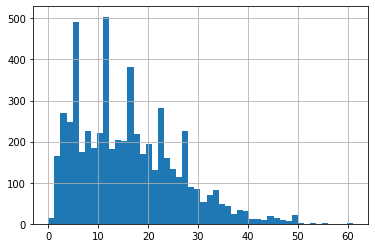

In [ ]:
# interesting features - DBH (Tree Diameters)
df_workhistory.INSP_TreeDBH.hist(bins=50)

In [ ]:
df_workhistory.groupby('INSP_TreeCondition')['INSP_TreeDBH'].mean()
#only 33 are excellent, can be ignored. 

INSP_TreeCondition
Critical     17.350746
Dead         11.333333
Excellent    11.031250
Fair         16.410499
Good         16.657796
Poor         16.609795
Unknown      15.338983
Name: INSP_TreeDBH, dtype: float64

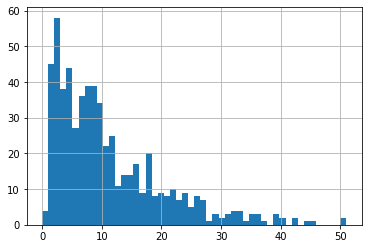

In [ ]:
df_workhistory[df_workhistory['INSP_TreeCondition'] == 'Dead'].INSP_TreeDBH.hist(bins=50)

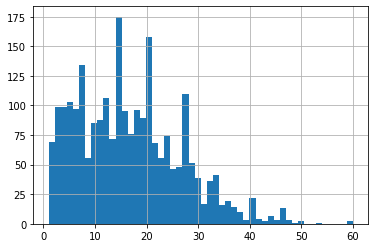

In [ ]:
df_workhistory[df_workhistory['INSP_TreeCondition'] == 'Good'].INSP_TreeDBH.hist(bins=50)

In [ ]:
df_workhistory['RiskRating_Grouped'] = df_workhistory.INSP_RiskRating.apply(lambda x: group_ratings(str(x)))
df_workhistory.groupby('RiskRating_Grouped')['INSP_TreeDBH'].mean()
# High Risk Rating Group has highest average DBH...

RiskRating_Grouped
Extreme     21.230769
High        23.171975
Low         16.611334
Moderate    21.403030
Unknown     14.694843
Name: INSP_TreeDBH, dtype: float64

In [ ]:
df_workhistory.INSP_Type.value_counts()

Level 1                     2929
Level 2                     2536
Sidewalk Rating              245
General - Planting Space      75
Level 3                       11
Name: INSP_Type, dtype: int64

### 201101

In [ ]:
print('% of trees inspected =',df_workhistory.Tree_GlobalID.nunique() / df_failedtrees.Tree_GlobalID.nunique())
print('% of trees uninspected =',1 - df_workhistory.Tree_GlobalID.nunique() / df_failedtrees.Tree_GlobalID.nunique())

% of trees inspected = 0.39814814814814814
% of trees uninspected = 0.6018518518518519


In [ ]:
df_workhistory.Tree_GlobalID.nunique()

3827

In [ ]:
df_failedtrees[df_failedtrees['PreFail_INSP_Rating'].notnull()].head(2)

In [ ]:
df_workhistory[df_workhistory['Tree_GlobalID']=='FFE98F14-0A2F-4B66-A81B-BDE21801421D']

In [ ]:
pd.reset_option('^display.', silent=True)


In [ ]:
df_workhistory.shape

(5796, 25)

In [ ]:
df_workhistory.merge(df_failedtrees,on='Tree_GlobalID',how='inner')

,Tree_GlobalID,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,INSP_TreeCondition,INSP_TreeStructure,INSP_TreeDBH,INSP_Comments,WO_CreatedDate,WO_ActualFinishDate,WO_Type,WO_Status,SR_GlobalID,SR_Type,SR_Source,SR_Status,SR_ResolutionAction,SR_CreatedDate,SR_ClosedDate,Tree_CreatedDate,Tree_Species,PostFail_SR_GlobalID,PostFail_SR_Type,PostFail_SR_Source,PostFail_SR_ResolutionAction,PostFail_SR_CreatedDate,PostFail_SR_CreatedYear,PostFail_SR_ClosedDate,NumberOfDuplicateSRs,PostFail_INSP_GlobalID,PostFail_INSP_InspectionDate,PostFail_INSP_Type,PostFail_INSP_Status,PostFail_INSP_Condition,PostFail_INSP_DBH,PostFail_INSP_Structure,PostFail_INSP_TRM,PostFail_WO_GlobalID,PostFail_WO_Type,DaysSinceInspection,PreFail_INSP_GlobalID,PreFail_INSP_InspectionDate,PreFail_INSP_Type,PreFail_INSP_Status,PreFail_INSP_Condition,PreFail_INSP_DBH,PreFail_INSP_Structure,PreFail_INSP_Rating,PreFail_INSP_TRM,Borough,CommunityBoard,CityCouncil,BuildingNumber,StreetName,TreeLocation,Shape,X_Coord,Y_Coord,FailedDuringStorm
0,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424892,3322695F-96DD-4ED0-9444-AA1F3F52DFBC,No,9/18/2017 12:41 PM,Low (3),Level 2,Yes,9/13/2017 7:17 AM,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,Dead,Full,2.0,NaN,9/18/2017 12:41 PM,NaN,Tree Removal,Cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/30/2017 7:28 AM,Tilia cordata - littleleaf linden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19733A1F-5ECC-4FFD-BE31-89C9990E15EB,3/23/2018 1:55 PM,Level 2,Closed,Dead,2.0,Full,Yes,A4FB4181-CD21-432D-A161-081972785746,Tree Down,186.0,3322695F-96DD-4ED0-9444-AA1F3F52DFBC,9/18/2017 12:41 PM,Level 2,Closed,Dead,2.0,Full,Low (3),Yes,Queens,411,19.0,242-16,NORTHERN BOULEVARD,Street,0xD7080000010C809D9979831A304100FE176BDEA20A41,1.055363e+06,218203.8023,Yes
1,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424893,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,No,8/30/2017 7:29 AM,NaN,Level 1,No,NaN,NaN,Dead,Full,2.0,BP17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/30/2017 7:28 AM,Tilia cordata - littleleaf linden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19733A1F-5ECC-4FFD-BE31-89C9990E15EB,3/23/2018 1:55 PM,Level 2,Closed,Dead,2.0,Full,Yes,A4FB4181-CD21-432D-A161-081972785746,Tree Down,186.0,3322695F-96DD-4ED0-9444-AA1F3F52DFBC,9/18/2017 12:41 PM,Level 2,Closed,Dead,2.0,Full,Low (3),Yes,Queens,411,19.0,242-16,NORTHERN BOULEVARD,Street,0xD7080000010C809D9979831A304100FE176BDEA20A41,1.055363e+06,218203.8023,Yes
2,B23389DD-3EDC-41EB-8CA8-000981F5D64B,6004857,A2AAC418-613F-4322-AD25-B90EB266069C,No,5/8/2017 9:24 AM,NaN,Level 1,No,NaN,NaN,Fair,Full,5.0,"4F, Block Prune FY18",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/5/2016 12:14 PM,Gleditsia triacanthos var. inermis - Thornless...,04A06479-9F67-46E4-9F17-41F11EAA7524,Tree Down - Street,3-1-1 Call Center,Work Completed,3/7/2019 7:34 PM,2019.0,3/11/2019 9:51 AM,1.0,BB308160-B810-46B9-A4AC-0485967FB117,3/8/2019 5:00 AM,Level 2,Closed,Critical,6.0,Full,Yes,997784E3-4289-452A-807C-F775F500C18F,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manhattan,101,1.0,10,HANOVER SQUARE,Street,0xD7080000010C8026858BD1F52D410000B5410EE90741,9.817368e+05,195873.7821,No
3,95E1F383-4504-4D1E-91BB-000AE2223385,6613156,D82E21D1-E69E-4ECF-A7C4-4BE7FAE4864B,No,10/31/2017 11:42 AM,NaN,Level 1,No,NaN,NaN,Good,Full,23.0,1F,10/31/2017 11:43 AM,NaN,Block Pruning,Cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/31/2017 11:42 AM,Quercus palustris - pin oak,791DF178-CF97-4C55-9934-6951C9D5492C,Tree Down - Sidewalk,Department of Parks and Recreation - Public We...,Work Completed,3/3/2018 4:12 PM,2018.0,3/7/2018 8:58 PM,2.0,B1567656-EA97-4197-964F-89B7DCF4D7E9,3/6/2018 3:20 PM,Level 1,Closed,Dead,23.0,Full,Yes,65D3793A-385B-4E56-A8D4-542D2B13FE1A,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Queens,408,24.0,184-44,MIDLAND PARKWAY,Street,0xD7080000010C80070020F0E12F4100560A5731C70841,1.044728e+06,202982.1675,Yes
4,95E1F383-4504-4D1E-91BB-000AE2223385,7118171,A087568D-255B-4702-89AE-B1951C7F02AD,No,3/

In [ ]:
df_failedtrees[df_failedtrees.PostFail_SR_GlobalID.isna()].head()

,Tree_GlobalID,Tree_CreatedDate,Tree_Species,PostFail_SR_GlobalID,PostFail_SR_Type,PostFail_SR_Source,PostFail_SR_ResolutionAction,PostFail_SR_CreatedDate,PostFail_SR_CreatedYear,PostFail_SR_ClosedDate,NumberOfDuplicateSRs,PostFail_INSP_GlobalID,PostFail_INSP_InspectionDate,PostFail_INSP_Type,PostFail_INSP_Status,PostFail_INSP_Condition,PostFail_INSP_DBH,PostFail_INSP_Structure,PostFail_INSP_TRM,PostFail_WO_GlobalID,PostFail_WO_Type,DaysSinceInspection,PreFail_INSP_GlobalID,PreFail_INSP_InspectionDate,PreFail_INSP_Type,PreFail_INSP_Status,PreFail_INSP_Condition,PreFail_INSP_DBH,PreFail_INSP_Structure,PreFail_INSP_Rating,PreFail_INSP_TRM,Borough,CommunityBoard,CityCouncil,BuildingNumber,StreetName,TreeLocation,Shape,X_Coord,Y_Coord,FailedDuringStorm
11,6FE5B77E-C177-4091-8AD2-552A23246A95,3/18/2015 4:00 AM,Celtis occidentalis - common hackberry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56D292B2-0680-4AE0-83AB-397B6666269B,3/16/2015 4:00 AM,Level 1,Closed,Excellent,18.0,Full,No,5D51B1A0-FE25-46E1-895B-6EFBEAB3853D,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manhattan,110,9.0,185,LENOX AVENUE,Street,0xD7080000010C80D4CC4C5B792E4100A425DF8C5A0C41,998573.6500,232273.6090,No
13,A1E1BE63-AE13-4F38-BE2D-FC25159F6D24,3/18/2015 4:00 AM,Koelreuteria paniculata - goldenrain tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410E520A-CF06-4945-AD9B-FA16624A538E,3/17/2015 4:00 AM,Level 1,Closed,Poor,4.0,Full,No,AB0CF8CF-493D-451F-8C4F-D6F6FE55CEB5,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manhattan,110,9.0,351,WEST 113 STREET,Street,0xD7080000010C00B647D161642E410000B5812E4D0C41,995888.9088,231845.8133,No
14,4D777C9D-E5AA-42BC-9E52-4352B9BB5928,3/20/2015 4:00 AM,Acer - maple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,009B8BDE-B74A-45B5-AAA1-5C11D854CD19,3/19/2015 4:00 AM,Level 1,Closed,Critical,3.0,Full,No,3132F4F6-5F6E-4533-B5C9-D06BE1DDEE0A,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Staten Island,501,49.0,461,HYLAN BOULEVARD NORTH,Street,0xD7080000010C80D4CCAC03652D4100782CF9BEA80341,963201.8375,161047.8717,No
15,141868EE-EC80-4C60-9D6F-3F09A6486FFE,3/20/2015 4:00 AM,Acer - maple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315374BD-5649-4E48-935F-FE6570B345A7,3/19/2015 4:00 AM,Level 1,Closed,Critical,8.0,Full,No,A92DC627-8097-40D2-8DDA-E220E76DB939,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Staten Island,503,51.0,575,WINANT AVENUE,Street,0xD7080000010C009088F0662F2C41009EEB1181100141,923571.4698,139792.1338,No
20,360EFB81-E54D-4D94-BFDA-FD3B0CE28784,3/24/2015 4:00 AM,Acer - maple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B7B9D4C1-EA4F-4CA7-A0A3-228E34455A92,3/23/2015 4:00 AM,Level 1,Closed,Critical,8.0,Full,No,105508C9-B113-4185-92E6-DE5C7552602B,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Staten Island,502,50.0,684,WEST FINGERBOARD ROAD,Street,0xD7080000010C8048A7452A632D4100A4259FAD500341,962965.1360,158229.7027,No


In [ ]:
df_workhistory[df_workhistory['Tree_GlobalID']=='7CE1CD3D-9B47-43AC-B1EA-AAEFBD9CC66C']

,Tree_GlobalID,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,INSP_TreeCondition,INSP_TreeStructure,INSP_TreeDBH,INSP_Comments,WO_CreatedDate,WO_ActualFinishDate,WO_Type,WO_Status,SR_GlobalID,SR_Type,SR_Source,SR_Status,SR_ResolutionAction,SR_CreatedDate,SR_ClosedDate
3771,7CE1CD3D-9B47-43AC-B1EA-AAEFBD9CC66C,105284,3F0A203D-F51F-423F-B29E-BB15C5AE21F7,No,3/19/2015 4:00 AM,NaN,Level 1,No,NaN,NaN,Good,Full,10.0,NaN,4/3/2015 4:00 AM,4/2/2015 4:00 AM,Pruning,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3772,7CE1CD3D-9B47-43AC-B1EA-AAEFBD9CC66C,10031601,5E73B754-001F-4B76-AEEF-F982C588F56F,No,3/18/2020 4:00 AM,Low (5),Level 2,No,NaN,NaN,Fair,Full,10.0,Cankers in stem with good response growth,3/18/2020 5:53 PM,NaN,Block Pruning,Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_failedtrees[df_failedtrees.PostFail_SR_GlobalID.isnull()].head()

,Tree_GlobalID,Tree_CreatedDate,Tree_Species,PostFail_SR_GlobalID,PostFail_SR_Type,PostFail_SR_Source,PostFail_SR_ResolutionAction,PostFail_SR_CreatedDate,PostFail_SR_CreatedYear,PostFail_SR_ClosedDate,NumberOfDuplicateSRs,PostFail_INSP_GlobalID,PostFail_INSP_InspectionDate,PostFail_INSP_Type,PostFail_INSP_Status,PostFail_INSP_Condition,PostFail_INSP_DBH,PostFail_INSP_Structure,PostFail_INSP_TRM,PostFail_WO_GlobalID,PostFail_WO_Type,DaysSinceInspection,PreFail_INSP_GlobalID,PreFail_INSP_InspectionDate,PreFail_INSP_Type,PreFail_INSP_Status,PreFail_INSP_Condition,PreFail_INSP_DBH,PreFail_INSP_Structure,PreFail_INSP_Rating,PreFail_INSP_TRM,Borough,CommunityBoard,CityCouncil,BuildingNumber,StreetName,TreeLocation,Shape,X_Coord,Y_Coord,FailedDuringStorm
11,6FE5B77E-C177-4091-8AD2-552A23246A95,3/18/2015 4:00 AM,Celtis occidentalis - common hackberry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56D292B2-0680-4AE0-83AB-397B6666269B,3/16/2015 4:00 AM,Level 1,Closed,Excellent,18.0,Full,No,5D51B1A0-FE25-46E1-895B-6EFBEAB3853D,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manhattan,110,9.0,185,LENOX AVENUE,Street,0xD7080000010C80D4CC4C5B792E4100A425DF8C5A0C41,998573.6500,232273.6090,No
13,A1E1BE63-AE13-4F38-BE2D-FC25159F6D24,3/18/2015 4:00 AM,Koelreuteria paniculata - goldenrain tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410E520A-CF06-4945-AD9B-FA16624A538E,3/17/2015 4:00 AM,Level 1,Closed,Poor,4.0,Full,No,AB0CF8CF-493D-451F-8C4F-D6F6FE55CEB5,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manhattan,110,9.0,351,WEST 113 STREET,Street,0xD7080000010C00B647D161642E410000B5812E4D0C41,995888.9088,231845.8133,No
14,4D777C9D-E5AA-42BC-9E52-4352B9BB5928,3/20/2015 4:00 AM,Acer - maple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,009B8BDE-B74A-45B5-AAA1-5C11D854CD19,3/19/2015 4:00 AM,Level 1,Closed,Critical,3.0,Full,No,3132F4F6-5F6E-4533-B5C9-D06BE1DDEE0A,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Staten Island,501,49.0,461,HYLAN BOULEVARD NORTH,Street,0xD7080000010C80D4CCAC03652D4100782CF9BEA80341,963201.8375,161047.8717,No
15,141868EE-EC80-4C60-9D6F-3F09A6486FFE,3/20/2015 4:00 AM,Acer - maple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315374BD-5649-4E48-935F-FE6570B345A7,3/19/2015 4:00 AM,Level 1,Closed,Critical,8.0,Full,No,A92DC627-8097-40D2-8DDA-E220E76DB939,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Staten Island,503,51.0,575,WINANT AVENUE,Street,0xD7080000010C009088F0662F2C41009EEB1181100141,923571.4698,139792.1338,No
20,360EFB81-E54D-4D94-BFDA-FD3B0CE28784,3/24/2015 4:00 AM,Acer - maple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B7B9D4C1-EA4F-4CA7-A0A3-228E34455A92,3/23/2015 4:00 AM,Level 1,Closed,Critical,8.0,Full,No,105508C9-B113-4185-92E6-DE5C7552602B,Tree Down,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Staten Island,502,50.0,684,WEST FINGERBOARD ROAD,Street,0xD7080000010C8048A7452A632D4100A4259FAD500341,962965.1360,158229.7027,No


In [ ]:
df_failedtrees.PostFail_SR_ResolutionAction.value_counts()

Work Completed                                     7448
Work Priority Category - C                          158
Inspected - Condition Not Found                     101
Work Priority Category - D                           74
Storm Debris Removal Pending                         51
No Action - Insufficient Info                        43
Inspected - No Work Order                            30
Reviewed - Inspection Assigned                       16
Work Priority Category - B                           15
Conflicting Jurisdiction                              7
No Action - Jurisdiction                              5
Work Order Created                                    4
Work Order Created - Work Priority Category C/D       3
Inspected - Location Not Found                        3
Work Priority Category - A                            2
Refer to NYCHA                                        1
Planting Declined - Unplantable                       1
T/S Inspected - Repair Pending                  

In [ ]:
df_failedtrees.isna().sum()

Tree_GlobalID                      0
Tree_CreatedDate                   0
Tree_Species                       0
PostFail_SR_GlobalID            1643
PostFail_SR_Type                1643
PostFail_SR_Source              1643
PostFail_SR_ResolutionAction    1648
PostFail_SR_CreatedDate         1643
PostFail_SR_CreatedYear         1643
PostFail_SR_ClosedDate          1850
NumberOfDuplicateSRs            1643
PostFail_INSP_GlobalID             0
PostFail_INSP_InspectionDate       2
PostFail_INSP_Type                 0
PostFail_INSP_Status               0
PostFail_INSP_Condition            0
PostFail_INSP_DBH                  8
PostFail_INSP_Structure            0
PostFail_INSP_TRM                  0
PostFail_WO_GlobalID               0
PostFail_WO_Type                   0
DaysSinceInspection             7828
PreFail_INSP_GlobalID           7828
PreFail_INSP_InspectionDate     7828
PreFail_INSP_Type               7828
PreFail_INSP_Status             7828
PreFail_INSP_Condition          7828
P

In [ ]:
df_failedtrees.PreFail_INSP_GlobalID.count() / df_failedtrees.Tree_GlobalID.count()
df_failedtrees.PostFail_SR_GlobalID.count() / df_failedtrees.Tree_GlobalID.count()

0.1856013316687474

In [ ]:
print(3498 / len(df_failedtrees))
df_failedtrees.groupby('PostFail_INSP_Condition')['Tree_GlobalID'].count()

0.36392009987515606


PostFail_INSP_Condition
Critical     3081
Dead         3498
Excellent       7
Fair          279
Good          258
Poor         1769
Unknown       720
Name: Tree_GlobalID, dtype: int64

In [ ]:
print(664 / df_failedtrees.PreFail_INSP_GlobalID.count())
df_failedtrees[df_failedtrees['PreFail_INSP_GlobalID'].notnull()].groupby('PostFail_INSP_Condition')['Tree_GlobalID'].count()

0.3721973094170404


PostFail_INSP_Condition
Critical     494
Dead         664
Excellent      2
Fair          49
Good          34
Poor         340
Unknown      201
Name: Tree_GlobalID, dtype: int64

In [ ]:
def group_ratings(x):
  y = ''
  if 'Low' in x:
    y = 'Low'
  elif 'Moderate' in x:
    y = 'Moderate'
  elif 'High' in x:
    y = 'High'
  elif 'Extreme' in x:
    y = 'Extreme'
  else:
    y = 'Unknown'
  return y
df_failedtrees['PreFail_INSP_Rating_Grouped'] = df_failedtrees['PreFail_INSP_Rating'].apply(lambda x: group_ratings(str(x)))

In [ ]:
df_failedtrees[df_failedtrees['PreFail_INSP_GlobalID'].notnull()].groupby(['PreFail_INSP_Rating_Grouped','PostFail_INSP_Condition'])['PostFail_INSP_Condition'].count()

PreFail_INSP_Rating_Grouped  PostFail_INSP_Condition
Extreme                      Critical                     5
                             Dead                         3
                             Poor                         4
High                         Critical                    25
                             Dead                        31
                             Excellent                    1
                             Fair                         1
                             Poor                        23
                             Unknown                     17
Low                          Critical                   349
                             Dead                       515
                             Fair                        39
                             Good                        25
                             Poor                       247
                             Unknown                    155
Moderate                     Critical          

In [ ]:
91 / 229

0.39737991266375544

In [ ]:
print(2834 / (df_failedtrees.shape[0]-df_failedtrees.PreFail_INSP_GlobalID.count()))
df_failedtrees[df_failedtrees['PreFail_INSP_GlobalID'].isna()].groupby('PostFail_INSP_Condition')['Tree_GlobalID'].count()

0.3620337250894226


PostFail_INSP_Condition
Critical     2587
Dead         2834
Excellent       5
Fair          230
Good          224
Poor         1429
Unknown       519
Name: Tree_GlobalID, dtype: int64

In [ ]:
df_workhistory.head(10)

,Tree_GlobalID,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,INSP_TreeCondition,INSP_TreeStructure,INSP_TreeDBH,INSP_Comments,WO_CreatedDate,WO_ActualFinishDate,WO_Type,WO_Status,SR_GlobalID,SR_Type,SR_Source,SR_Status,SR_ResolutionAction,SR_CreatedDate,SR_ClosedDate
0,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424892,3322695F-96DD-4ED0-9444-AA1F3F52DFBC,No,9/18/2017 12:41 PM,Low (3),Level 2,Yes,9/13/2017 7:17 AM,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,Dead,Full,2.0,NaN,9/18/2017 12:41 PM,NaN,Tree Removal,Cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424893,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,No,8/30/2017 7:29 AM,NaN,Level 1,No,NaN,NaN,Dead,Full,2.0,BP17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B23389DD-3EDC-41EB-8CA8-000981F5D64B,6004857,A2AAC418-613F-4322-AD25-B90EB266069C,No,5/8/2017 9:24 AM,NaN,Level 1,No,NaN,NaN,Fair,Full,5.0,"4F, Block Prune FY18",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,95E1F383-4504-4D1E-91BB-000AE2223385,6613156,D82E21D1-E69E-4ECF-A7C4-4BE7FAE4864B,No,10/31/2017 11:42 AM,NaN,Level 1,No,NaN,NaN,Good,Full,23.0,1F,10/31/2017 11:43 AM,NaN,Block Pruning,Cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,95E1F383-4504-4D1E-91BB-000AE2223385,7118171,A087568D-255B-4702-89AE-B1951C7F02AD,No,3/6/2018 5:00 AM,NaN,Level 1,No,NaN,NaN,Critical,Full,21.0,TREE DOWN BLOCKING ENTRANCE OV THE HOUSE,NaN,NaN,NaN,NaN,791DF178-CF97-4C55-9934-6951C9D5492C,Tree Down - Sidewalk,Department of Parks and Recreation - Public We...,Closed,Work Completed,3/3/2018 4:12 PM,3/7/2018 8:58 PM
5,1954F552-A0D3-423A-B634-000B9B3C5A8C,6126446,3040BCB8-A93C-40E6-BF50-97E41BD936F5,No,6/5/2017 10:00 AM,Moderate (9),Level 2,No,NaN,NaN,Dead,Full,5.0,NaN,6/5/2017 10:00 AM,NaN,Tree Removal,Cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,14AD6C46-EC00-4FF4-810B-00121B2F186E,5950917,A8227577-8E3B-44AF-A003-567DBCDF9365,No,4/20/2017 10:22 AM,NaN,Level 1,No,NaN,NaN,Fair,Full,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,EFBAF01F-4A03-4B92-8305-0012C453A924,7975513,7B3F5599-8E5E-46D6-8A3F-21BB1D303F7C,No,11/30/2018 11:32 AM,Low (4),Level 2,Yes,12/4/2018 8:19 AM,C5CB4519-FD13-4461-B533-B968EC5A66E3,Dead,Full,17.0,NaN,11/30/2018 11:33 AM,NaN,Tree Removal,Cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,EFBAF01F-4A03-4B92-8305-0012C453A924,7975514,C5CB4519-FD13-4461-B533-B968EC5A66E3,No,11/20/2018 1:38 PM,NaN,Level 1,No,NaN,NaN,Poor,Full,17.0,1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8B8C92C9-91D8-4ED4-A70F-003954F872F1,7798819,2879A84F-2422-4E4F-B7D9-E49A2C3EB12C,No,10/10/2018 1:07 PM,NaN,Level 1,No,NaN,NaN,Good,Full,5.0,BP-B19,10/17/2018 10:25 AM,12/31/2018 10:00 AM,Block Pruning,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_workhistory.SR_ResolutionAction.value_counts()

Work Completed                                   850
Inspected - No Work Order                        524
Inspected - Condition Not Found                  259
T/S Inspected - Repair Pending                   196
No Action - Insufficient Info                     49
Work Priority Category - C                        40
Reviewed - Block Pruning                          38
Work Priority Category - D                        21
Reviewed - Inspection Assigned                    18
Conflicting Jurisdiction                          15
Inspected - Tentatively Approved for Planting     12
Storm Debris Removal Pending                      11
T/S Inspected - Ineligible                        11
Work Order Created                                 9
No Action - Jurisdiction                           9
SW Consultation Provided                           3
Inspected - Location Not Found                     2
Refer to DOT                                       1
Planting Declined - Unplantable               

In [ ]:
pd.reset_option('^display.', silent=True)

In [ ]:
df_workhistory.groupby('Tree_GlobalID')['INSPID'].count().to_frame().reset_index()

,Tree_GlobalID,INSPID
0,000D0797-4592-4992-9D88-BE3B0169776B,2
1,000D75D3-9D77-4EC7-B96B-68698D6CC1CA,1
2,00242E7A-F26A-4A16-8F0F-6CD3F65D0F8D,1
3,003A3CEB-7A6F-401A-B314-42D0EF6C1E6B,1
4,0041157E-FCBA-48FC-9A2B-0BA72D21B3C0,1
...,...,...
3822,FFBD30BA-0A07-4D93-BDFF-CF4750D0B9DC,1
3823,FFCD639A-7CF1-45A5-9823-363B27AFB7F5,1
3824,FFE98F14-0A2F-4B66-A81B-BDE21801421D,5
3825,FFF3FEBB-CE8D-42D2-B59A-9D9EA9B2FD78,3


In [4]:
SR = pd.read_csv(r'/Users/harrison/Desktop/Homeworks/ut-hub/nycparks_failedtrees/data/data_clean_to_share/SRData_Cornell_20211028_REVISED.csv')

In [79]:
df_workhistory.INSP_GlobalID.isin(SR['INSP GlobalID']).sum()

1151

In [76]:
df_workhistory[df_workhistory.INSP_GlobalID.isin(SR['INSP GlobalID'])]

,Tree_GlobalID,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,...,WO_ActualFinishDate,WO_Type,WO_Status,SR_GlobalID,SR_Type,SR_Source,SR_Status,SR_ResolutionAction,SR_CreatedDate,SR_ClosedDate
4,95E1F383-4504-4D1E-91BB-000AE2223385,7118171,A087568D-255B-4702-89AE-B1951C7F02AD,No,3/6/2018 5:00 AM,NaN,Level 1,No,NaN,NaN,...,NaN,NaN,NaN,791DF178-CF97-4C55-9934-6951C9D5492C,Tree Down - Sidewalk,Department of Parks and Recreation - Public We...,Closed,Work Completed,3/3/2018 4:12 PM,3/7/2018 8:58 PM
10,A2C590F0-4AE2-428A-BD34-003F870CCC9C,10366804,55CFF50C-0EFA-4EE2-98FE-649D9131B2DE,No,5/18/2020 5:05 PM,Low (8),Level 2,No,NaN,NaN,...,NaN,NaN,NaN,0E5C655A-3B41-4621-A06F-FF1132ACDA71,Tree Leaning,Department of Parks and Recreation - Public We...,Closed,Inspected - No Work Order,5/15/2020 4:06 PM,5/18/2020 5:05 PM
12,C2775315-6F15-4721-BB0B-0063B394091F,9111594,46022659-DFF9-4B2F-83AF-935C6D2FD478,No,9/16/2019 10:53 AM,Low (7),Level 2,No,NaN,NaN,...,11/12/2020 5:00 AM,Tree Removal,Closed,0C4E2D11-D081-4398-98DC-CBCC350BD0D1,Dead Tree Older Than 2 Years,3-1-1 Call Center,Closed,Work Completed,8/31/2019 8:05 PM,11/12/2020 6:30 PM
13,C2775315-6F15-4721-BB0B-0063B394091F,9693273,0FD4A97E-0ACD-417C-B991-5660C96C7819,No,2/8/2020 5:00 AM,Low (8),Level 2,No,NaN,NaN,...,NaN,NaN,NaN,1A30F0AA-4A8E-4C61-AAED-C5309EB0EE24,Limb Down - Sidewalk,3-1-1 Call Center,Closed,Work Completed,2/7/2020 8:00 PM,2/8/2020 5:03 PM
21,9DC461A9-4A3C-4EF4-880E-00EA8A590F17,8021206,65E69C79-837D-49D9-A729-94B0333EF720,No,12/7/2018 11:11 AM,Low (7),Level 2,No,NaN,NaN,...,NaN,Tree Removal,Cancel,74196C67-21F5-4AB8-8062-E35A9FDFBA2C,Dead Tree Older Than 2 Years,3-1-1 Call Center,Closed,Inspected - No Work Order,11/19/2018 6:19 PM,11/21/2020 11:11 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,F5F2BC9C-15C7-4DBD-9217-FF4CD1F7495E,10178029,D98400A0-4945-4413-BB72-2A19ADFAB544,No,4/13/2020 4:00 AM,Low (4),Level 2,No,NaN,NaN,...,NaN,Limb Down,Cancel,32079B80-B611-4083-ABF4-6C1B2FC7A36C,Tree Leaning,Department of Parks and Recreation - Public We...,Closed,Work Completed,4/13/2020 2:02 PM,4/14/2020 10:51 PM
5775,F5F2BC9C-15C7-4DBD-9217-FF4CD1F7495E,10178433,104C00F6-7276-45CA-A058-60DD4AF68759,No,4/13/2020 4:00 AM,Low (3),Level 2,No,NaN,NaN,...,NaN,Hanging Limb,Cancel,D69AB012-E087-4642-BA61-0054B39B4783,Tree Down - Sidewalk,Department of Parks and Recreation - Public We...,Closed,Work Completed,4/13/2020 1:53 PM,4/14/2020 10:51 PM
5788,F0CDE3B3-7D02-45B8-92C2-FF7E8538E604,8785948,3D16D7EC-7DE0-4E40-9E32-B2E197B995D3,No,6/25/2019 9:18 AM,Low (8),Level 2,No,NaN,NaN,...,6/26/2019 4:00 AM,Limb Down,Closed,25C983C2-D33E-48C6-9DD0-9ACD9A51529E,Limb Down - Sidewalk,Correspondence,Closed,Work Completed,6/25/2019 10:22 AM,6/26/2019 6:39 PM
5789,DB9CDD42-395A-4A7D-9569-FF82C7F45D18,7158183,9938D9F5-43F4-432E-95BB-6CBF79BA0653,No,3/13/2018 11:16 AM,Low (8),Level 2,No,NaN,NaN,...,NaN,NaN,NaN,29D63281-B83D-427D-BD2F-52462F76CA98,Poor Condition Cracked,3-1-1 Call Center,Closed,No Action - Insufficient Info,3/11/2018 1:42 AM,3/13/2018 11:14 AM


In [30]:
df_workhistory.drop_duplicates(inplace=True)

In [66]:
df_riskassessments1 = df_riskassessments[~df_riskassessments.INSP_GlobalID.duplicated()]

In [42]:
join1

,Tree_GlobalID_x,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,...,Tree_GlobalID_y,Risk_GlobalID,Risk_Defect,Risk_DefectLocation,Risk_Failure,Risk_ImpactTarget,Risk_FailureImpact,Risk_FailureConsequence,RiskRating,MitigationRecommendation
0,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424892,3322695F-96DD-4ED0-9444-AA1F3F52DFBC,No,9/18/2017 12:41 PM,Low (3),Level 2,Yes,9/13/2017 7:17 AM,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,...,7B9CC3BB-45E4-4317-863F-000052F2BAF8,097C1C4D-7957-49C3-A2E7-C1FABFE556D2,Dead Wood,Stem,Improbable (1),Very Low (1),Unlikely (2),Negligible (1),Low (3),NaN
1,7B9CC3BB-45E4-4317-863F-000052F2BAF8,6424893,70BD3775-EF50-4B44-B5DB-34440BE0DEC7,No,8/30/2017 7:29 AM,NaN,Level 1,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B23389DD-3EDC-41EB-8CA8-000981F5D64B,6004857,A2AAC418-613F-4322-AD25-B90EB266069C,No,5/8/2017 9:24 AM,NaN,Level 1,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,95E1F383-4504-4D1E-91BB-000AE2223385,6613156,D82E21D1-E69E-4ECF-A7C4-4BE7FAE4864B,No,10/31/2017 11:42 AM,NaN,Level 1,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,95E1F383-4504-4D1E-91BB-000AE2223385,7118171,A087568D-255B-4702-89AE-B1951C7F02AD,No,3/6/2018 5:00 AM,NaN,Level 1,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,95BA9143-87AE-422D-9164-FF89A1CE87BB,5135914,0708F62F-8379-4593-A59E-0B91A8FFB69D,No,11/17/2016 8:23 AM,NaN,Level 1,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6018,95BA9143-87AE-422D-9164-FF89A1CE87BB,5172367,1713AD90-D4DD-42C2-86BA-8A24D311D7F4,No,11/21/2016 8:01 PM,NaN,General - Planting Space,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6019,F3D0C2BB-34A5-46DD-93C2-FFB67E17F658,8069653,85391E9D-1454-49CE-AE49-504974935D4F,No,1/7/2019 11:38 AM,Low (6),Level 2,No,NaN,NaN,...,F3D0C2BB-34A5-46DD-93C2-FFB67E17F658,806217C8-B04C-4264-B2D2-FCA8C44FD7CB,Dead Wood,Branches,Possible (2),Low (2),Unlikely (4),Minor (2),Low (6),NaN
6020,8D246514-63DC-4F7C-A0E8-FFC68FE53BA7,9486641,8C4B7785-F411-4FE3-A11B-70F05C5B3035,No,1/7/2020 5:00 AM,Low (3),Level 2,No,NaN,NaN,...,8D246514-63DC-4F7C-A0E8-FFC68FE53BA7,BAF73CFB-9A2E-4ADB-ADF2-C2BF9A4B293E,Dead Wood,Branches,Improbable (1),Very Low (1),Unlikely (2),Negligible (1),Low (3),NaN


In [39]:
join1 = df_workhistory.merge(df_riskassessments, on=['INSP_GlobalID','INSPID'], how='left' )

In [87]:
join2 = df_failedtrees.merge(join1, left_on='Tree_GlobalID',right_on='Tree_GlobalID_x', how='outer').sort_values(by='Tree_GlobalID')

In [61]:
#3115 failed trees has work done
#p(work done | failed trees) = 0.32407407407407407
#p(no work done | failed trees) = 0.6759259259259259
join2[join2['WO_Type'].notnull()].Tree_GlobalID.nunique()

3115

In [100]:
#p(risk rating | failed trees) 
join2[join2.Risk_GlobalID.notnull()].Tree_GlobalID.nunique()

1756

In [128]:
join3 = join2.set_index(['Tree_GlobalID','index'])

In [141]:
join3[join3.Risk_GlobalID.notnull()]

Tree_CreatedDate  \
Tree_GlobalID                        index                        
000D0797-4592-4992-9D88-BE3B0169776B 1227    10/16/2015 4:24 PM   
004653A8-5C5B-4E4C-AE0B-AB360DA162CE 3730      1/5/2016 3:33 PM   
                                     3728      1/5/2016 3:33 PM   
                                     3729      1/5/2016 3:33 PM   
004FD969-B7DE-4595-8662-6BEFBC2FFDEE 9872   12/20/2017 11:11 AM   
...                                                         ...   
FFE98F14-0A2F-4B66-A81B-BDE21801421D 34       3/30/2015 4:00 AM   
FFF3FEBB-CE8D-42D2-B59A-9D9EA9B2FD78 9207    2/23/2017 10:50 AM   
FFF5E4B4-A9B4-4673-A1AC-95D0F2EFA027 7374     7/27/2016 2:39 PM   
                                     7375     7/27/2016 2:39 PM   
                                     7373     7/27/2016 2:39 PM   

                                                                                 Tree_Species  \
Tree_GlobalID                        index                                                      
000D0797-4592-4992-9D88-BE3B0169776B 1227             Aesculus hippocastanum - horse chestnut   
004653A8-5C5B-4E4C-AE0B-AB360DA162CE 3730                  Fraxinus pennsylvanica - Green ash   
                                     3728                  Fraxinus pennsylvanica - Green ash   
                                     3729                  Fraxinus pennsylvanica - Green ash   
004FD969-B7DE-4595-8662-6BEFBC2FFDEE 9872                 Robinia pseudoacacia - black locust   
...                                                                                       ...   
FFE98F14-0A2F-4B66-A81B-BDE21801421D 34                     Tilia cordata - littleleaf linden   
FFF3FEBB-CE8D-42D2-B59A-9D9EA9B2FD78 9207   Gleditsia triacanthos var. inermis - Thornless...   
FFF5E4B4-A9B4-4673-A1AC-95D0F2EFA027 7374            Platanus x acerifolia - London planetree   
                                     7375            Platanus x acerifolia - London planetree   
                                     7373            Platanus x acerifolia - London planetree   

                                                            PostFail_SR_GlobalID  \
Tree_GlobalID                        index                                         
000D0797-4592-4992-9D88-BE3B0169776B 1227   3818AD1D-6FD6-4187-B609-CA6DA4F3BC58   
004653A8-5C5B-4E4C-AE0B-AB360DA162CE 3730   EAD04493-E6B0-4C36-8378-831BADE4577B   
                                     3728   EAD04493-E6B0-4C36-8378-831BADE4577B   
                                     3729   EAD04493-E6B0-4C36-8378-831BADE4577B   
004FD969-B7DE-4595-8662-6BEFBC2FFDEE 9872   2F629ACA-A598-4E1C-AA7F-1AE755211ED9   
...                                                                          ...   
FFE98F14-0A2F-4B66-A81B-BDE21801421D 34     46BA8B9E-039A-42F2-B9A9-2DAB193600D9   
FFF3FEBB-CE8D-42D2-B59A-9D9EA9B2FD78 9207                                    NaN   
FFF5E4B4-A9B4-4673-A1AC-95D0F2EFA027 7374   F7A894D3-B91E-4972-A833-AAE3C6D1BFEF   
                                     7375   F7A894D3-B91E-4972-A833-AAE3C6D1BFEF   
                                     7373   F7A894D3-B91E-4972-A833-AAE3C6D1BFEF   

                                                        PostFail_SR_Type  \
Tree_GlobalID                        index                                 
000D0797-4592-4992-9D88-BE3B0169776B 1227                Tree Down - Car   
004653A8-5C5B-4E4C-AE0B-AB360DA162CE 3730           Limb Down - Sidewalk   
                                     3728           Limb Down - Sidewalk   
                                     3729           Limb Down - Sidewalk   
004FD969-B7DE-4595-8662-6BEFBC2FFDEE 9872   Limb Down - Park Active Area   
...                                                                  ...   
FFE98F14-0A2F-4B66-A81B-BDE21801421D 34               Tree Down - Street   
FFF3FEBB-CE8D-42D2-B59A-9D9EA9B2FD78 9207                            NaN   
FFF5E4B4-A9B4-4673-A1AC-95D0F2EFA027 7374           Tree Dow

In [90]:
df_failedtrees.merge(SR, left_on='PreFail_INSP_GlobalID', right_on='INSP GlobalID')

In [5]:
SR = SR[SR['TPID'].notnull()]

In [6]:
SR.shape

(119558, 42)

In [9]:
SR[SR['INSP GlobalID'].notnull()]

,SRNumber,SRID,SR ComplaintNumber,SRSource,SRBorough,SRCommunityBoard,SRCategory,SRtype,SRStatus,SRResolutionActionValue,...,WOPriorityCategory,WOStatus,WOCreatedDate,ActualFinishDate,WOEntity,TPID,TPDBH,TPStructure,TPCondition,TPSpecies
0,1.0,8209567.0,1-1-1426982767,3-1-1 Call Center,Brooklyn,311.0,Root/Sewer/Sidewalk,Trees and Sidewalks,Closed,T/S Inspected - Repair Pending,...,E,Alternate,6/25/2018 16:29,NaN,Expense,4633602.0,9.0,Full,Good,Tilia tomentosa
2,1.0,8209569.0,1-1-1426975783,3-1-1 Call Center,Queens,407.0,Root/Sewer/Sidewalk,Trees and Sidewalks,Closed,T/S Inspected - Repair Pending,...,E,Alternate,3/14/2018 14:41,NaN,Expense,2503759.0,14.0,Full,Good,Acer rubrum
3,1.0,8199583.0,1-1-1427090262,3-1-1 Call Center,Bronx,206.0,Remove Tree,Dead Tree Older Than 2 Years,Closed,Inspected - No Work Order,...,B,Cancel,7/14/2017 11:40,NaN,In-House,2266452.0,22.0,Stump,Dead,Fraxinus pennsylvanica
5,1.0,8199585.0,1-1-1426945132,3-1-1 Call Center,Queens,413.0,Hazard,Tree Down - Other,Closed,Inspected - Condition Not Found,...,D,Cancel,6/30/2017 13:12,NaN,In-House,3712582.0,6.0,Full,Poor,Fagus grandifolia
6,1.0,8199586.0,1-1-1481144471,3-1-1 Call Center,Staten Island,503.0,Hazard,Hanging Limb from other Branches,Closed,Work Completed,...,C,Closed,WORK ORDER INFORMATION,12/20/2017 5:00,In-House,2911084.0,13.0,Retired,Dead,Acer saccharinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233556,1.0,17957267.0,311-03019044,3-1-1 Call Center,Staten Island,501.0,Prune,Clear Building,Closed,Work Priority Category - D,...,D,Open,7/8/2020 14:18,NaN,In-House,2603555.0,12.0,Full,Fair,Pyrus calleryana
233557,1.0,17957273.0,311-03019085,3-1-1 Call Center,Staten Island,501.0,Illegal Tree Damage,Branches Damaged,Closed,Work Completed,...,D,Closed,7/2/2020 17:40,12/28/2020 5:00,In-House,2601528.0,21.0,Full,Poor,Liquidambar styraciflua
233558,1.0,17957277.0,311-03019144,3-1-1 Call Center,Brooklyn,315.0,Hazard,Tree Down - Sidewalk,Closed,Work Completed,...,C,Cancel,7/13/2020 13:09,NaN,Expense,1055699.0,21.0,Retired,Unknown,Fraxinus pennsylvanica
233606,1.0,17957753.0,311-03019894,Department of Parks and Recreation - Public We...,Bronx,211.0,Illegal Tree Damage,Unauthorized Tree Removal,Closed,No Action - Insufficient Info,...,E,NaN,NaN,NaN,NaN,2545262.0,3.0,Stump,Dead,Gymnocladus dioicus


In [37]:
SR.columns

Index(['SRNumber', 'SRID', 'SR ComplaintNumber', 'SRSource', 'SRBorough',
       'SRCommunityBoard', 'SRCategory', 'SRtype', 'SRStatus',
       'SRResolutionActionValue', 'Insp Type RA', 'SRParentStatus',
       'SR GlobalID', 'SR ServiceRequestParentGlobalID', 'SRCreatedDate',
       'SRClosedDate', 'INSPID', 'INSPType', 'INSPDBH', 'INSPStructure',
       'INSPCondtion', 'INSP_Max_RiskAssment', 'INSPCreatedDate',
       'InspectionDate', 'INSPClosedDate', 'InspectedByERN', 'INSPEntityType',
       'INSP GlobalID', 'WOID', 'WOCategory', 'WOType', 'WORating',
       'WOPriorityCategory', 'WOStatus', 'WOCreatedDate', 'ActualFinishDate',
       'WOEntity', 'TPID', 'TPDBH', 'TPStructure', 'TPCondition', 'TPSpecies'],
      dtype='object')

In [31]:
#join SR to workhistory on SRID, gives 1000 rows.
#only 1000 trees in work history matches with records on SR data, while there are 2000 records in work history 
#dataset with a SR
df_workhistory.merge(SR[SR['INSP GlobalID'].notnull()], left_on='SR_GlobalID',right_on='SR GlobalID')

,Tree_GlobalID,INSPID_x,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,...,WOPriorityCategory,WOStatus,WOCreatedDate,ActualFinishDate,WOEntity,TPID,TPDBH,TPStructure,TPCondition,TPSpecies
0,95E1F383-4504-4D1E-91BB-000AE2223385,7118171,A087568D-255B-4702-89AE-B1951C7F02AD,No,3/6/2018 5:00 AM,NaN,Level 1,No,NaN,NaN,...,E,NaN,NaN,NaN,NaN,5082301.0,21.0,Stump,Dead,Quercus palustris
1,95E1F383-4504-4D1E-91BB-000AE2223385,7118171,A087568D-255B-4702-89AE-B1951C7F02AD,No,3/6/2018 5:00 AM,NaN,Level 1,No,NaN,NaN,...,A,Closed,3/6/2018 15:20,3/7/2018 5:00,In-House,5082301.0,21.0,Stump,Dead,Quercus palustris
2,95E1F383-4504-4D1E-91BB-000AE2223385,7118171,A087568D-255B-4702-89AE-B1951C7F02AD,No,3/6/2018 5:00 AM,NaN,Level 1,No,NaN,NaN,...,A,Closed,3/6/2018 10:19,3/7/2018 5:00,In-House,3732193.0,15.0,Retired,Dead,Acer platanoides
3,A2C590F0-4AE2-428A-BD34-003F870CCC9C,10366804,55CFF50C-0EFA-4EE2-98FE-649D9131B2DE,No,5/18/2020 5:05 PM,Low (8),Level 2,No,NaN,NaN,...,C,Open,5/19/2020 15:53,NaN,In-House,4130029.0,22.0,Full,Dead,NaN
4,C2775315-6F15-4721-BB0B-0063B394091F,9111594,46022659-DFF9-4B2F-83AF-935C6D2FD478,No,9/16/2019 10:53 AM,Low (7),Level 2,No,NaN,NaN,...,C,Closed,10/1/2019 17:08,9/17/2020 4:00,In-House,949367.0,34.0,Full,Good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,F5F2BC9C-15C7-4DBD-9217-FF4CD1F7495E,10178433,104C00F6-7276-45CA-A058-60DD4AF68759,No,4/13/2020 4:00 AM,Low (3),Level 2,No,NaN,NaN,...,D,Cancel,4/13/2020 14:29,NaN,In-House,2490776.0,11.0,Stump,Dead,Pyrus calleryana
1010,F5F2BC9C-15C7-4DBD-9217-FF4CD1F7495E,10178433,104C00F6-7276-45CA-A058-60DD4AF68759,No,4/13/2020 4:00 AM,Low (3),Level 2,No,NaN,NaN,...,C,Closed,4/13/2020 15:34,4/13/2020 4:00,In-House,10554256.0,18.0,Shaft,Poor,Acer platanoides
1011,F0CDE3B3-7D02-45B8-92C2-FF7E8538E604,8785948,3D16D7EC-7DE0-4E40-9E32-B2E197B995D3,No,6/25/2019 9:18 AM,Low (8),Level 2,No,NaN,NaN,...,E,NaN,NaN,NaN,NaN,2402838.0,14.0,Full,Poor,Pyrus calleryana
1012,DB9CDD42-395A-4A7D-9569-FF82C7F45D18,7158183,9938D9F5-43F4-432E-95BB-6CBF79BA0653,No,3/13/2018 11:16 AM,Low (8),Level 2,No,NaN,NaN,...,D,Closed,5/7/2018 12:42,7/19/2018 4:00,In-House,4640008.0,7.0,Stump,Dead,Acer rubrum


In [11]:
df_workhistory.merge(SR[SR['INSP GlobalID'].notnull()], left_on='INSP_GlobalID',right_on='INSP GlobalID')

,Tree_GlobalID,INSPID_x,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,...,WOPriorityCategory,WOStatus,WOCreatedDate,ActualFinishDate,WOEntity,TPID,TPDBH,TPStructure,TPCondition,TPSpecies
0,95E1F383-4504-4D1E-91BB-000AE2223385,7118171,A087568D-255B-4702-89AE-B1951C7F02AD,No,3/6/2018 5:00 AM,NaN,Level 1,No,NaN,NaN,...,E,NaN,NaN,NaN,NaN,5082301.0,21.0,Stump,Dead,Quercus palustris
1,A2C590F0-4AE2-428A-BD34-003F870CCC9C,10366804,55CFF50C-0EFA-4EE2-98FE-649D9131B2DE,No,5/18/2020 5:05 PM,Low (8),Level 2,No,NaN,NaN,...,C,Open,5/19/2020 15:53,NaN,In-House,4130029.0,22.0,Full,Dead,NaN
2,C2775315-6F15-4721-BB0B-0063B394091F,9111594,46022659-DFF9-4B2F-83AF-935C6D2FD478,No,9/16/2019 10:53 AM,Low (7),Level 2,No,NaN,NaN,...,C,Closed,10/1/2019 17:08,9/17/2020 4:00,In-House,949367.0,34.0,Full,Good,NaN
3,DEE88E4D-B258-4A34-8CB1-0132D6F330D0,7383576,FBD5A3BE-57C8-4FC3-A50B-9D02DA217BD7,No,5/30/2018 4:00 AM,Low (6),Level 2,No,NaN,NaN,...,C,Cancel,6/4/2018 11:17,NaN,In-House,3642557.0,6.0,Full,Good,Carpinus betulus
4,58AE8052-8692-4E11-850F-0169D61D2CA5,7348870,8E74E72D-1589-4912-A822-374F8202E262,No,5/16/2018 8:47 AM,Low (7),Level 2,No,NaN,NaN,...,B,Closed,5/17/2018 10:50,5/17/2018 4:00,In-House,176523.0,NaN,Stump,Dead,Tilia cordata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,F5F2BC9C-15C7-4DBD-9217-FF4CD1F7495E,10178029,D98400A0-4945-4413-BB72-2A19ADFAB544,No,4/13/2020 4:00 AM,Low (4),Level 2,No,NaN,NaN,...,C,Closed,4/13/2020 16:36,6/3/2020 4:00,In-House,2628032.0,20.0,Stump,Dead,Acer saccharinum
761,F5F2BC9C-15C7-4DBD-9217-FF4CD1F7495E,10178433,104C00F6-7276-45CA-A058-60DD4AF68759,No,4/13/2020 4:00 AM,Low (3),Level 2,No,NaN,NaN,...,C,Closed,4/13/2020 15:34,4/13/2020 4:00,In-House,10554256.0,18.0,Shaft,Poor,Acer platanoides
762,F0CDE3B3-7D02-45B8-92C2-FF7E8538E604,8785948,3D16D7EC-7DE0-4E40-9E32-B2E197B995D3,No,6/25/2019 9:18 AM,Low (8),Level 2,No,NaN,NaN,...,E,NaN,NaN,NaN,NaN,2402838.0,14.0,Full,Poor,Pyrus calleryana
763,DB9CDD42-395A-4A7D-9569-FF82C7F45D18,7158183,9938D9F5-43F4-432E-95BB-6CBF79BA0653,No,3/13/2018 11:16 AM,Low (8),Level 2,No,NaN,NaN,...,D,Closed,5/7/2018 12:42,7/19/2018 4:00,In-House,4640008.0,7.0,Stump,Dead,Acer rubrum


In [36]:
df_workhistory[df_workhistory.SR_GlobalID.notnull()]

,Tree_GlobalID,INSPID,INSP_GlobalID,AddressedFailure,INSP_InspectionDate,INSP_RiskRating,INSP_Type,IsReinspection,INSP_ReinspectionDate,INSP_ParentInspectionGlobalID,...,WO_ActualFinishDate,WO_Type,WO_Status,SR_GlobalID,SR_Type,SR_Source,SR_Status,SR_ResolutionAction,SR_CreatedDate,SR_ClosedDate
4,95E1F383-4504-4D1E-91BB-000AE2223385,7118171,A087568D-255B-4702-89AE-B1951C7F02AD,No,3/6/2018 5:00 AM,NaN,Level 1,No,NaN,NaN,...,NaN,NaN,NaN,791DF178-CF97-4C55-9934-6951C9D5492C,Tree Down - Sidewalk,Department of Parks and Recreation - Public We...,Closed,Work Completed,3/3/2018 4:12 PM,3/7/2018 8:58 PM
10,A2C590F0-4AE2-428A-BD34-003F870CCC9C,10366804,55CFF50C-0EFA-4EE2-98FE-649D9131B2DE,No,5/18/2020 5:05 PM,Low (8),Level 2,No,NaN,NaN,...,NaN,NaN,NaN,0E5C655A-3B41-4621-A06F-FF1132ACDA71,Tree Leaning,Department of Parks and Recreation - Public We...,Closed,Inspected - No Work Order,5/15/2020 4:06 PM,5/18/2020 5:05 PM
12,C2775315-6F15-4721-BB0B-0063B394091F,9111594,46022659-DFF9-4B2F-83AF-935C6D2FD478,No,9/16/2019 10:53 AM,Low (7),Level 2,No,NaN,NaN,...,11/12/2020 5:00 AM,Tree Removal,Closed,0C4E2D11-D081-4398-98DC-CBCC350BD0D1,Dead Tree Older Than 2 Years,3-1-1 Call Center,Closed,Work Completed,8/31/2019 8:05 PM,11/12/2020 6:30 PM
13,C2775315-6F15-4721-BB0B-0063B394091F,9693273,0FD4A97E-0ACD-417C-B991-5660C96C7819,No,2/8/2020 5:00 AM,Low (8),Level 2,No,NaN,NaN,...,NaN,NaN,NaN,1A30F0AA-4A8E-4C61-AAED-C5309EB0EE24,Limb Down - Sidewalk,3-1-1 Call Center,Closed,Work Completed,2/7/2020 8:00 PM,2/8/2020 5:03 PM
20,9DC461A9-4A3C-4EF4-880E-00EA8A590F17,4129072,1756E333-99E9-4ED3-91D5-54F361F6B6A1,No,7/28/2016 4:00 AM,NaN,Level 2,No,NaN,NaN,...,8/23/2016 4:00 AM,Limb Down,Closed,A54FE212-262D-4CDE-B61A-A1E85A7D62A8,Limb Down - Other,3-1-1 Call Center,Closed,Work Completed,7/18/2016 9:19 PM,1/13/2017 1:27 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5788,F0CDE3B3-7D02-45B8-92C2-FF7E8538E604,8785948,3D16D7EC-7DE0-4E40-9E32-B2E197B995D3,No,6/25/2019 9:18 AM,Low (8),Level 2,No,NaN,NaN,...,6/26/2019 4:00 AM,Limb Down,Closed,25C983C2-D33E-48C6-9DD0-9ACD9A51529E,Limb Down - Sidewalk,Correspondence,Closed,Work Completed,6/25/2019 10:22 AM,6/26/2019 6:39 PM
5789,DB9CDD42-395A-4A7D-9569-FF82C7F45D18,7158183,9938D9F5-43F4-432E-95BB-6CBF79BA0653,No,3/13/2018 11:16 AM,Low (8),Level 2,No,NaN,NaN,...,NaN,NaN,NaN,29D63281-B83D-427D-BD2F-52462F76CA98,Poor Condition Cracked,3-1-1 Call Center,Closed,No Action - Insufficient Info,3/11/2018 1:42 AM,3/13/2018 11:14 AM
5790,95BA9143-87AE-422D-9164-FF89A1CE87BB,7396402,6904A131-9C5F-47A7-9935-AB3B6BD09D21,No,6/1/2018 11:18 AM,Low (5),Level 2,No,NaN,NaN,...,NaN,Tree Removal,Cancel,F9EF3E47-BDCA-4EE7-8C8B-4533156EC825,Poor Condition Cracked,3-1-1 Call Center,Closed,Inspected - No Work Order,5/21/2018 5:49 PM,7/27/2018 12:46 PM
5791,95BA9143-87AE-422D-9164-FF89A1CE87BB,5135914,0708F62F-8379-4593-A59E-0B91A8FFB69D,No,11/17/2016 8:23 AM,NaN,Level 1,No,NaN,NaN,...,11/20/2016 5:00 AM,Tree Down,Closed,B7E3B70F-E1E8-4C30-ABCE-5DC8BDFAC72F,Tree Down - Sidewalk,3-1-1 Call Center,Closed,Work Completed,11/16/2016 10:58 PM,11/21/2016 2:25 PM
